<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>



**Integrantes**

* *Juan Pablo Castillo 201573534-4*

* *Gabriel Astorga 201573591-3*


In [115]:
%matplotlib inline

<a id="primero"></a>
## 1. Máquinas de aprendizaje aplicadas a la medicina
En el area de la salud, diagnosticar la enfermedad de una persona de forma rápida y correcta puede llegar a salvarle la vida. Los encargados de realizar estos diagnósticos, son médicos que, observando exámenes y ciertos indicadores, pueden concluir qué enfermedad presenta el paciente. Si el médico se llegase a equivocar, aparte de que el paciente pueda perder la vida, el medico podría ser demandado por negligencia arriesgando años de cárcel o pagar sumas de dinero considerable, es por estas razones que es importante no cometer errores.  
Pongámonos en el contexto de que usted es contratado para utilizar técnicas de aprendizaje de máquina para asistir en un problema médico como es la detección de enfermedades cardiacas. El diagnóstico de una enfermedad cardiaca se realiza a través de signos clínicos y resultados de pruebas médicas, los cuales usted deberá utilizar en busca del comportamiento normal y anormal de los pacientes, para así obtener un modelo que prediga si el paciente en efecto presenta una enfermedad o no.


<img src="https://www.scripps.edu/_files/images/science-and-medicines/600x400_heart_illustration_xray.jpg" width="35%" />


In [116]:
import pandas as pd
import numpy as np
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
#Sex
df['sex'] = df['sex'].replace({0:'female', 1:'male'})
#Chest pain
df['chest_pain'] = df['chest_pain'].replace({1:'typical angina', 2: 'atypical angina', 3:'non-anginal pain', 4: 'asymtomatic'})
#blood_s
df['blood_s'] = df['blood_s'].replace({0:'lower than 120mg/ml', 1:'greater than 120mg/ml'})
#electro
df['electro'] = df['electro'].replace({0:'normal', 1:'ST-T wave abnormality', 2:'left ventricular hypertrophy'})
#angina
df['angina'] = df['angina'].replace({0:'no', 1:'yes'})
#slope
df['slope'] = df['slope'].replace({1: 'upsloping', 2:'flat', 3:'downsloping'})
#thal
df['thal'] = df['thal'].replace({3:'normal', 6:'fixed defect', 7:'reversable defect'})   

In [117]:
df

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,male,asymtomatic,130.0,322.0,lower than 120mg/ml,left ventricular hypertrophy,109.0,no,2.4,flat,3.0,normal,2
1,67.0,female,non-anginal pain,115.0,564.0,lower than 120mg/ml,left ventricular hypertrophy,160.0,no,1.6,flat,0.0,reversable defect,1
2,57.0,male,atypical angina,124.0,261.0,lower than 120mg/ml,normal,141.0,no,0.3,upsloping,0.0,reversable defect,2
3,64.0,male,asymtomatic,128.0,263.0,lower than 120mg/ml,normal,105.0,yes,0.2,flat,1.0,reversable defect,1
4,74.0,female,atypical angina,120.0,269.0,lower than 120mg/ml,left ventricular hypertrophy,121.0,yes,0.2,upsloping,1.0,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,male,non-anginal pain,172.0,199.0,greater than 120mg/ml,normal,162.0,no,0.5,upsloping,0.0,reversable defect,1
266,44.0,male,atypical angina,120.0,263.0,lower than 120mg/ml,normal,173.0,no,0.0,upsloping,0.0,reversable defect,1
267,56.0,female,atypical angina,140.0,294.0,lower than 120mg/ml,left ventricular hypertrophy,153.0,no,1.3,flat,0.0,normal,1
268,57.0,male,asymtomatic,140.0,192.0,lower than 120mg/ml,normal,148.0,no,0.4,flat,0.0,fixed defect,1



> a) Visualice los datos trabajados describiendo el comportamiento de las variables para entender el problema al que se enfrenta. ¿Qué ocurre con el comportamiento entre pacientes sanos y enfermos? Haga gráficos si estima conveniente (histogramas, boxplots, etc).
```python
df.head()
df.info()
df.describe()
```


In [118]:
df.head()

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,male,asymtomatic,130.0,322.0,lower than 120mg/ml,left ventricular hypertrophy,109.0,no,2.4,flat,3.0,normal,2
1,67.0,female,non-anginal pain,115.0,564.0,lower than 120mg/ml,left ventricular hypertrophy,160.0,no,1.6,flat,0.0,reversable defect,1
2,57.0,male,atypical angina,124.0,261.0,lower than 120mg/ml,normal,141.0,no,0.3,upsloping,0.0,reversable defect,2
3,64.0,male,asymtomatic,128.0,263.0,lower than 120mg/ml,normal,105.0,yes,0.2,flat,1.0,reversable defect,1
4,74.0,female,atypical angina,120.0,269.0,lower than 120mg/ml,left ventricular hypertrophy,121.0,yes,0.2,upsloping,1.0,normal,1


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age           270 non-null float64
sex           270 non-null object
chest_pain    270 non-null object
blood_p       270 non-null float64
serum         270 non-null float64
blood_s       270 non-null object
electro       270 non-null object
max_heart     270 non-null float64
angina        270 non-null object
oldpeak       270 non-null float64
slope         270 non-null object
vessel        270 non-null float64
thal          270 non-null object
normal        270 non-null int64
dtypes: float64(6), int64(1), object(7)
memory usage: 29.7+ KB


In [120]:
df.describe()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370,1.444444
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896,0.497827
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000,1.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000,1.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000,1.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000,2.000000


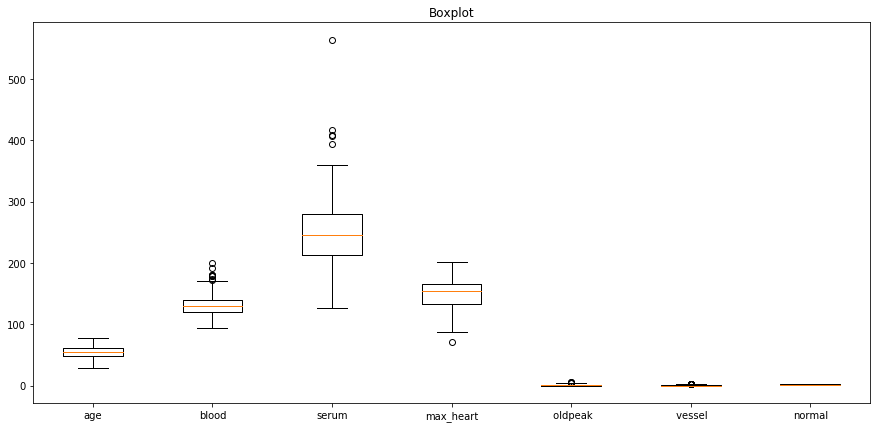

In [121]:
import matplotlib.pyplot as plt
describe = df.describe()

fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.set_title('Boxplot')
data_plot = [df['age'], df['blood_p'], df['serum'], df['max_heart'], df['oldpeak'], df['vessel'], df['normal']]
labels = ['age', 'blood', 'serum', 'max_heart', ' oldpeak', ' vessel', 'normal']
ax1.boxplot(data_plot, labels = labels)
plt.show()

<Figure size 1080x504 with 0 Axes>

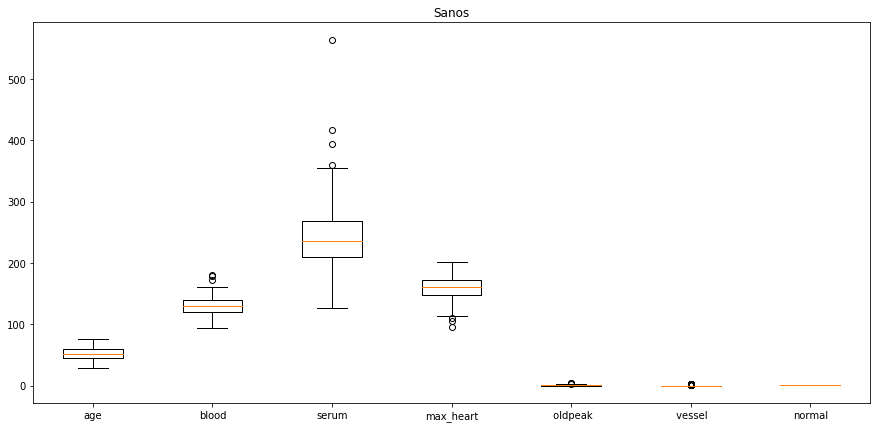

In [122]:
enfermos = df.loc[df['normal'] == 2]
sanos = df.loc[df['normal'] == 1]

plt.figure(figsize=(15,7))
#BoxPlot sanos 
fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.set_title('Sanos')
data_plot = [sanos['age'], sanos['blood_p'], sanos['serum'], sanos['max_heart'], sanos['oldpeak'], sanos['vessel'], sanos['normal']]
labels = ['age', 'blood', 'serum', 'max_heart', ' oldpeak', ' vessel', 'normal']
ax1.boxplot(data_plot, labels = labels)
plt.show()

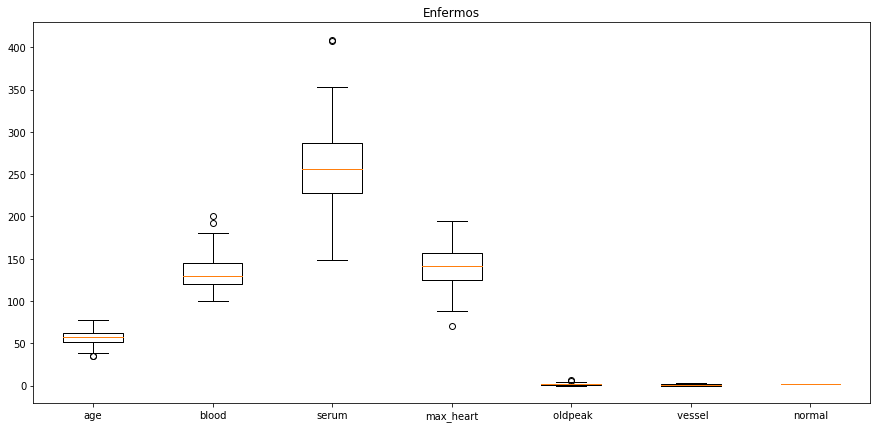

In [123]:
fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.set_title('Enfermos')
data_plot = [enfermos['age'], enfermos['blood_p'], enfermos['serum'], enfermos['max_heart'], enfermos['oldpeak'], enfermos['vessel'], enfermos['normal']]
labels = ['age', 'blood', 'serum', 'max_heart', ' oldpeak', ' vessel', 'normal']
ax1.boxplot(data_plot, labels = labels)
plt.show()

In [124]:
sex_enfermos = enfermos.groupby('blood_s').count()
sex_sanos = sanos.groupby('blood_s').count()

electro_enfermos = enfermos.groupby('electro').count()
electro_sanos = sanos.groupby('electro').count()

chest_enfermos = enfermos.groupby('chest_pain').count()
chest_sanos = sanos.groupby('chest_pain').count()

slope_enfermos = enfermos.groupby('slope').count()
slope_sanos = sanos.groupby('slope').count()

angina_enfermos = enfermos.groupby('angina').count()
angina_sanos = sanos.groupby('angina').count()


A partir de los datos entregados no se puede concluir nada a simple vista de que sintomas describen mejor, si un paciente subre de una enfermedad cardiaca. Puesto como se observan en los boxplots las variables 'numericas' de distribuyen parecido, y aquellas  variables categoricas no existe una predominante entre los pacientes enfermos y sanos. Sin embargo se puede decir que serum, max_heart, blood podrian ser aquellas variables importantes a la hora de predecir, puesto que sus valores fluctuan bastante.


> b) Debido a que utilizaremos modelos lineales, necesitaremos una representación adecuada de los datos. Codifique las variables con valores categóricos para ser representados como *one hot vectors*, indicando con un 1 la presencia del atributo en cuestión. Por ejemplo, si un paciente tiene el atributo "sex: female", quedará codificado como [0,1], mientras que si tiene el atributo "sex: male", quedará como [1,0]. **Explique la importancia de éste paso.**
```python
df = pd.get_dummies(df)
df.head()
```

In [125]:
df = pd.get_dummies(df)
df.head()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymtomatic,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,...,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


Este paso es importante debido a que se utilizaran modelos lineales, estos modelos no son capaces de aprender directamente de una etiqueta (label), es decir, estos modelos necesitan que todas las variables de entrada y salida sean numericas. Por lo tanto es suma mente importante utilizar una representación númerica de las variables categoricas para que así los modelos puedan aprender.

### Predecir la presión sanguínea 



En primera instancia trabajaremos en el dominio de regresión para predecir el comportamiento de alguna de las variables involucradas con el fin de entender cómo se comportan y si es posible estimar alguna de ellas a partir de las otras. Como ayuda se le indica que una alta presión sanguínea (*blood preasure*) podría ser un indicador de riesgo en temas cardíacos, en específico, para el problema se le comenta la hipótesis de que el comportamiento anormal de la variable presión sanguínea es un buen indicador para la detección de enfermedades cardíacas. 
Su objetivo dada esta información será la de predecir el comportamiento de esta variable en función de las otras, para luego detectar qué tan distante es el valor real al valor predecido y así detectar las enfermedades.


> c) Extraiga la información de la enfermedad cardíaca (*clase binaria*) además de la variable continua que nos intereserá predecir en esta instancia (*target*) con un modelo de regresión lineal.
```python
class_label = df.pop("normal").values -1 # 0 means absence, 1 means presence
reg_label = df.pop("blood_p").values
X_data = df.values
```



In [126]:
class_label = df.pop("normal").values -1 # 0 means absence, 1 means presence
reg_label = df.pop("blood_p").values
X_data = df.values
X_data

array([[ 70., 322., 109., ...,   0.,   1.,   0.],
       [ 67., 564., 160., ...,   0.,   0.,   1.],
       [ 57., 261., 141., ...,   0.,   0.,   1.],
       ...,
       [ 56., 294., 153., ...,   0.,   1.,   0.],
       [ 57., 192., 148., ...,   1.,   0.,   0.],
       [ 67., 286., 108., ...,   0.,   1.,   0.]])

> d) Cree un conjunto de pruebas para evaluar los modelos construidos en el problema. Extraiga el 30\% de los datos del conjunto total para representar el conjunto de pruebas.
```python
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30
...
X_train = X_data[~mask_test] 
X_test = X_data[mask_test] 
...
reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]
...
class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]
...
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)
```

In [127]:
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30

X_train = X_data[~mask_test] 
X_test = X_data[mask_test] 

class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]


reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]

print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

Train:  (184, 24)
Test:  (86, 24)


> e) Realice una estandarización normal de los datos de entrada al modelo (*input*). **Comente la importancia/conveniencia de realizar este paso**. 
```python
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)
```

In [128]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)


La importancia de este paso es solucionar el problema de que diferentes variables pueden estar medidas en escalas muy diferentes, por lo que al analizar el "peso" de estas al final del entrenamiento del modelo no se puede concluir demasiado sobre la relevancia de estas en la predicción del modelo debido a la diferencia grande que pudiera existir entre variables. Es por esto que estandarizar los datos es importante, puesto que los coeficientes del modelo nos entregan más información sobre la importancia de cierto parámetro a la hora de predecir.

> f) Realice una regresión lineal de mı́nimos cuadrados básica para predecir el nivel de presión sanguínea. Mida los errores de predicción para cada dato en el conjunto de entrenamiento. Utilizando un *quantile-quantile plot* determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.
```python
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)
...
reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)
```

Text(0.5, 1.0, 'Train set')

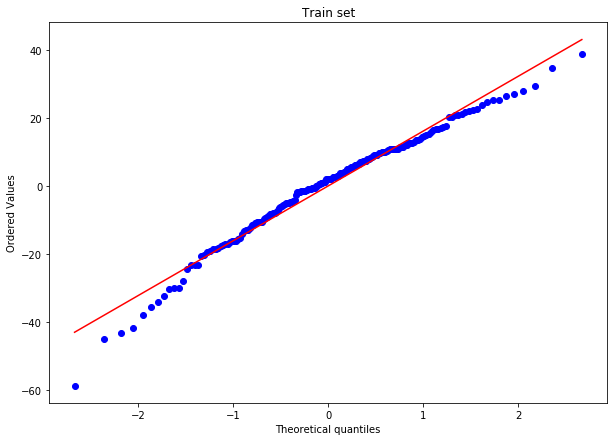

In [129]:
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt

model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)

reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)

residue_train =  reg_pred_train - reg_label_train
residue_test =  reg_pred_test - reg_label_test
#Train plot
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111)
res = stats.probplot(residue_train, dist='norm', plot=ax)
ax.set_title("Train set")


Text(0.5, 1.0, 'Test set')

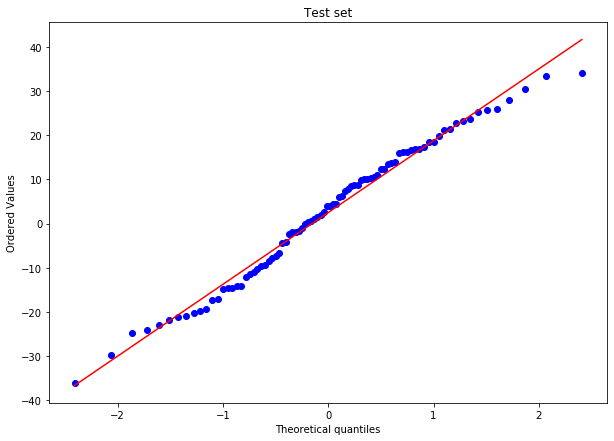

In [130]:
#Test plot
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111)
res = stats.probplot(residue_test, dist='norm', plot=ax)
ax.set_title("Test set")


De acuerdo los QQ plots mostrados anteriormente se observa que los puntos siguen la recta, por lo que se podria decir que efectivamente es posible afirmar que los residuos del modelo siguen una distribución normal. Esto significa que en teoría el modelo explica todas en el conjunto de datos entrenamiento como de test. 

> g) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? ¿Qué variables están más correlacionadas con la respuesta?


In [131]:
#Coeficients
coeficients = pd.DataFrame({'variables': df.columns, 'model_coef': model.coef_})

In [132]:
#Z-score
y = reg_label_train - reg_pred_train 
y_2 = y.dot(y)
variance = y_2/(y.shape[0]-model.coef_.shape[0]-1)

z_scores = np.zeros(model.coef_.shape)
for i in range(model.coef_.shape[0]):
    mean_x_i = np.mean(Xstd_train[:,i])
    mean_y = np.mean(reg_label_train)
    x_diff = Xstd_train[:,i] - mean_x_i
    y_diff = reg_label_train - mean_y
    num = np.dot(x_diff, y_diff) 
    den = np.dot(x_diff, x_diff)**0.5
    z_score = num/(den * variance)
    z_scores[i] =abs(z_score)

In [133]:
#F-score
n = z_scores.shape[0]

F_scores = np.zeros(n)
for i in range(n):
    mean_x_i = np.mean(Xstd_train[:,i])
    mean_y = np.mean(reg_label_train)
    x_diff = Xstd_train[:,i] - mean_x_i
    y_diff = reg_label_train - mean_y
    num = np.dot(x_diff, y_diff) 
    den = (np.dot(x_diff, x_diff)**0.5)*(np.dot(y_diff, y_diff)**0.5)
    p_i2 = (num/den)**2
    f_score = ((n-2)*p_i2)/(1 - p_i2)
    F_scores[i] = abs(f_score)
    
coeficients = pd.DataFrame({'model_coef': abs(model.coef_)}, index = df.columns)
F_score = pd.DataFrame({'f-score': F_scores}, index = df.columns)
    
z_score = pd.DataFrame({'z-score': z_scores}, index = df.columns)
coeficients.sort_values(by = ['model_coef'], ascending = False)

,model_coef
age,3.703575
oldpeak,3.398092
serum,2.192226
electro_ST-T wave abnormality,2.150000
vessel,1.798951
blood_s_lower than 120mg/ml,1.486991
blood_s_greater than 120mg/ml,1.486991
slope_downsloping,1.286419
chest_pain_typical angina,1.146328
chest_pain_non-anginal pain,1.089938


In [134]:
z_score.sort_values(by = ['z-score'], ascending = False)

,z-score
age,0.229716
oldpeak,0.170533
serum,0.153252
electro_normal,0.139131
slope_downsloping,0.137959
blood_s_greater than 120mg/ml,0.137707
blood_s_lower than 120mg/ml,0.137707
electro_ST-T wave abnormality,0.130871
electro_left ventricular hypertrophy,0.111801
max_heart,0.096189


In [135]:
F_score.sort_values(by = ['f-score'], ascending = False)

,f-score
age,1.892334
oldpeak,1.004108
serum,0.803860
electro_normal,0.658319
slope_downsloping,0.646948
blood_s_greater than 120mg/ml,0.644513
blood_s_lower than 120mg/ml,0.644513
electro_ST-T wave abnormality,0.580467
electro_left ventricular hypertrophy,0.420629
max_heart,0.309817


De acuerdo con los coeficientes, aquellos con coeficiente más "grande" deberian ser aquellos más correlacionados para predecir la presión, entre estos se encuentran: 'age', oldpeak y serum, este top 3 no se mueven independiente de las 3 métricas que utilizamos. Sin embargo se nota que max_heart se muestra al final del ranking segun los pesos del modelo, pero en las demás metricas no lo situa tan mal dentro del ranking, por lo tanto hay que tener mucho cuidado al conclur a partir de los pesos entregados directamente por el modelo.

> h) Para evaluar la calidad de las predicciones del modelo sobre el problema utilice el error absoluto medio (*mean absolute error*). Comente los resultados sobre en ambos conjuntos y la interpretación que se le da a la métrica de evaluación en el problema.

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print ('Std train set: ', np.std(reg_label_train))
print("MSE train: ", mean_absolute_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_absolute_error(reg_label_test, reg_pred_test))

Std train set:  18.079495221051253
MSE train:  12.520139292308562
MSE test:  13.660613351999706


Como se observan los errores de minimos cuadrados de los datos de entrenamiento y de prueba estan muy cercanos, por lo que se podria decir que el modelo no sufre mucho de sobre ajuste. También se observa que el error es menor y cercano a la desviación estándar de los datos, por lo que se concluye que el error del modelo es menor que variación misma de los datos, lo que es bueno para un modelo de predicción.

> i) Estime la calidad del modelo usando validación cruzada con un número de *fold* igual a $K=1$ (*leave-one-out*) y $K=5$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Compare esta estimación *vs* la calidad real (en conjunto de pruebas) y concluya.


In [137]:
K=5
from sklearn.model_selection import KFold
kf = KFold(n_splits=K)
mse_cv = 0
for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
mse_cv = mse_cv / K
print(mse_fold)
mse_cv

344.49776664140353


362.1008805407525

Se observa que a partir de one leave out y validación cruzada con k = 5, que leave one out (cross validation con k = n) tienen un menor error, sin embargo el costo de entrenamiento en mucho más grande.

> j) Debido a la creación de varias columnas *dummys* en el punto b), experimente con técnicas de regularización para mejorar el desempeño de su modelo. Para ésto ajuste un modelo lineal utilizando "*Ridge Regression*", es decir, regularizando con la norma $l_2$, varíe los parámetros de regularización si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa.

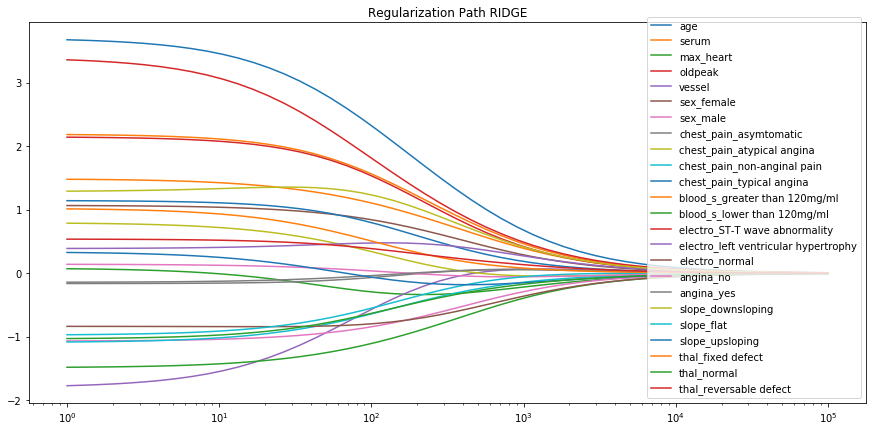

In [138]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

Se observa que aquellas variables más importantes permanecen con un coeficiente significativo a medida que la penalización aumenta, sin embargo los demas coeficientes no se van completamente a 0, permanecen en el modelo con un valor mayor a 0.

> k) Ahora experimente regularizando con la norma $l_1$, lo que corresponde a utilizar el método "*Lasso*". Vuelva a realizar el gráfico mostrando los coeficientes obtenidos, describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?

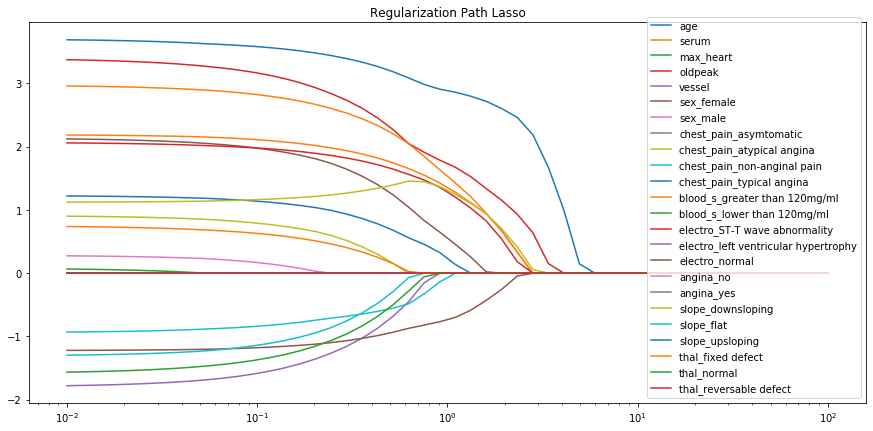

In [139]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
    
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Lasso')
plt.legend(loc='lower right')
plt.show()

Lasso es más efectivo, puesto "fuerza" a aquellos coeficientes de los atributos que no son muy relevantes en la predicción a irse a 0, por tanto en el modelo no son considerados, lo que se traduce en un ahorro computacional.pPor otra parte en Ridge no ocurre lo mismo, los coeficiente siguen manteniendose en el modelo con valores desprecibles pero mayores que 0, además esto podria conllevar a problemas de precisión si estos son muy pequeños.

> l) Evalúe la calidad de estos dos modelos en ambos conjuntos a distintos valores del parámetro de regularización. Haga uso de la *widget* interactiva de *ipython*. Comente ¿Con qué valor de *alpha* se quedaría en cada caso?

In [140]:
from ipywidgets import interactive

def train_model(param, modelToUse):
    if modelToUse == 'Ridge':
        model = Ridge(fit_intercept=True, solver='svd')
    else:
        model = Lasso(fit_intercept=True)

    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -10 #define your range
p_max = 10 #define your range
interactive(train_model, param=(p_min,p_max), modelToUse = ['Rige', 'Lasso'])

interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), Dropdown(description='modelToU…

Con Ridge se quedaria con alpha = 10 puesto que desde ese valor el error converge y no fluctua. Con Lasso ocurre lo mismo, desde alpha = 10 el error no varia.

> m) De manera más estricta un médico le solicita un modelo que solo cuente con 5 características (variables) para predecir el nivel de presión sanguínea. Usted bien conoce un método que selecciona características de manera iterativa (*greedy*), con la idea de que la característica seleccionada tenga el mejor aporte sobre el desempeño del modelo. Construya una función que implemente *Forward Step-wise Selection* (FSS) sobre el modelo de regresión lineal clásico.  Para seleccionar localmente una característica, **proponga/implemente un criterio distinto al utilizado en el código de ejemplo** (**no** utilice el conjunto de pruebas). Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo.


In [141]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return selected
features_fss = fss(Xstd_train, reg_label_train, names_regressors)
need_feat = features_fss[:5]

selected = age ...
totalvars=2, mse = 300.159978
selected = slope_downsloping ...
totalvars=3, mse = 290.470506
selected = electro_ST-T wave abnormality ...
totalvars=4, mse = 284.618970
selected = serum ...
totalvars=5, mse = 279.587430
selected = blood_s_greater than 120mg/ml ...
totalvars=6, mse = 275.297670
selected = oldpeak ...
totalvars=7, mse = 271.730415
selected = vessel ...
totalvars=8, mse = 269.396124
selected = chest_pain_non-anginal pain ...
totalvars=9, mse = 267.395934
selected = sex_female ...
totalvars=10, mse = 265.175946
selected = electro_left ventricular hypertrophy ...
totalvars=11, mse = 263.871372
selected = chest_pain_asymtomatic ...
totalvars=12, mse = 262.426018
selected = thal_normal ...
totalvars=13, mse = 261.104377
selected = slope_flat ...
totalvars=14, mse = 259.919532
selected = chest_pain_atypical angina ...
totalvars=15, mse = 259.704707
selected = angina_no ...
totalvars=16, mse = 259.633150
selected = max_heart ...
totalvars=17, mse = 259.629299


In [142]:
import copy

def bss(x, y, names_x, k = 10000):
    p = x.shape[1]
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = copy.copy(remaining)
    current_score = best_new_score = 0.0
    while remaining and len(selected)>1:
        print(len(selected))
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = copy.copy(selected)
            indexes.remove(candidate)
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop(1)
        remaining.remove(best_candidate)
        selected.remove(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return selected
features_bss = bss(Xstd_train, reg_label_train, names_regressors)
need_feat = features_bss[:5]

24
selected = vessel ...
totalvars=23, mse = 266.344463
23
selected = oldpeak ...
totalvars=22, mse = 266.357971
22
selected = serum ...
totalvars=21, mse = 270.380371
21
selected = max_heart ...
totalvars=20, mse = 270.439941
20
selected = chest_pain_atypical angina ...
totalvars=19, mse = 270.439941
19
selected = chest_pain_non-anginal pain ...
totalvars=18, mse = 271.827950
18
selected = chest_pain_typical angina ...
totalvars=17, mse = 273.705585
17
selected = sex_male ...
totalvars=16, mse = 274.980729
16
selected = sex_female ...
totalvars=15, mse = 277.872859
15
selected = chest_pain_asymtomatic ...
totalvars=14, mse = 278.330248
14
selected = angina_yes ...
totalvars=13, mse = 286.478309
13
selected = electro_ST-T wave abnormality ...
totalvars=12, mse = 285.998308
12
selected = slope_downsloping ...
totalvars=11, mse = 291.254668
11
selected = slope_upsloping ...
totalvars=10, mse = 295.886231
10
selected = angina_no ...
totalvars=9, mse = 319.238711
9
selected = electro_norma

> n) Realice otra modificación al algoritmo FSS anterior, en donde se deba entrenar el modelo predictor una sola vez. Cree alguna huerística de selección que le permita realizar ésto.

> o) Realice una modificación a los datos y agregue entre 10 a 100 atributos falsos, es decir, atributos aleatorios generados que no tienen relación con la variable de predicción (*target*). Para ésto utilice una distribución normal con valor esperado diferente de 0 y una cierta desviación estándar. Utilice alguna de las técnicas de selección de atributos (Ridge, Lasso, FSS) para evaluar la efectividad en eliminar estos atributos falsos ¿Depende del nivel de ruido (desviación estándar)?


In [143]:
D = 10
names_regressors = df.columns
fake_name_regressors = [f'fake {x}' for x in range(D)]
F = np.random.normal(loc = 4, scale = 10000, size=(184,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)
names_regressors = list(names_regressors) + list(fake_name_regressors)
names_regressors
features_fss = fss(X_new_train, reg_label_train, names_regressors)


selected = age ...
totalvars=2, mse = 300.931879
selected = slope_downsloping ...
totalvars=3, mse = 290.535000
selected = electro_ST-T wave abnormality ...
totalvars=4, mse = 285.131281
selected = serum ...
totalvars=5, mse = 279.935172
selected = fake 2 ...
totalvars=6, mse = 275.018782
selected = blood_s_greater than 120mg/ml ...
totalvars=7, mse = 270.878587
selected = oldpeak ...
totalvars=8, mse = 266.304160
selected = chest_pain_typical angina ...
totalvars=9, mse = 263.084907
selected = fake 3 ...
totalvars=10, mse = 259.899452
selected = fake 5 ...
totalvars=11, mse = 256.938394
selected = vessel ...
totalvars=12, mse = 254.938933
selected = sex_female ...
totalvars=13, mse = 253.459962
selected = fake 0 ...
totalvars=14, mse = 252.118668
selected = thal_normal ...
totalvars=15, mse = 250.433368
selected = fake 4 ...
totalvars=16, mse = 249.105405
selected = chest_pain_non-anginal pain ...
totalvars=17, mse = 247.853707
selected = fake 6 ...
totalvars=18, mse = 246.960132
sele

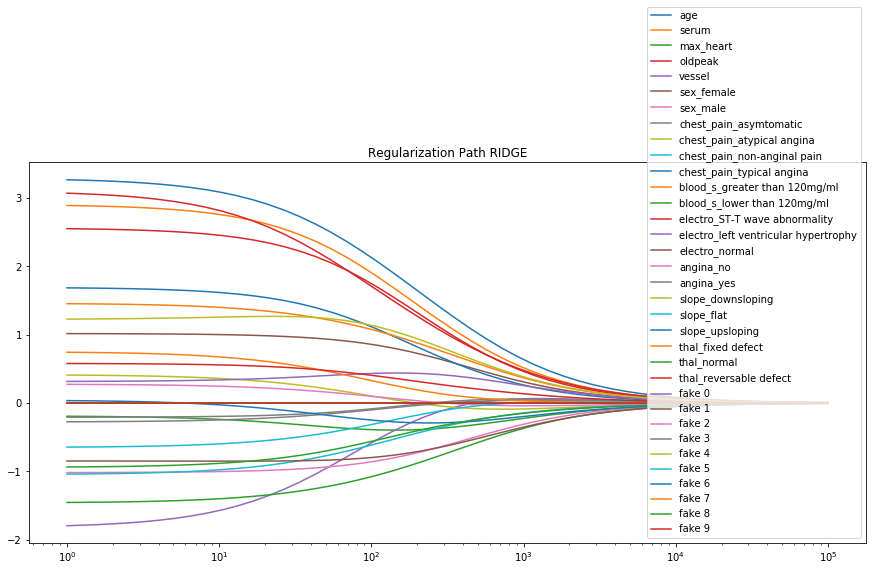

In [144]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_new_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

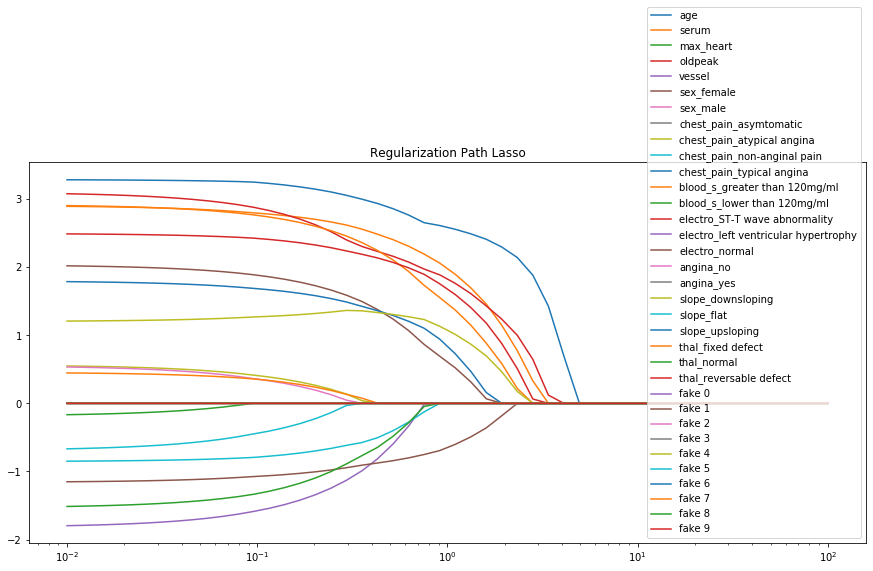

In [145]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_new_train, reg_label_train)
    coefs.append(model.coef_)
    
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Lasso')
plt.legend(loc='lower right')
plt.show()

Al observar los distintos casos observamos que la desviación estándar si influye, a medida que la desviación estandár de los datos aumenta los métodos fss, Ridge y Lasso, descartan rápidamente aquella variables "fake" con mayor desviación estándar.

### Detectar una enfermedad 
Con toda la información obtenida de la experimentación previa, deberá hacer la predicción de la enfermedad cardíaca, ésto es un problema binario de clasificación de dos clases (presencia o ausencia de la enfermedad). Para explorar la hipótesis que le fue entregada en un inicio, de que el comportamiento anormal (*outlier*) de presión sanguínea sobre las personas es un indicio de alguna enfermedad, deberá utilizar los datos de los pacientes que se encuentran sanos (comportamiento normal).

> p) Entrene un modelo de regresión lineal, el mejor explorado en la experimentación previa, para predecir la presión sanguínea de los pacientes sanos, así obtener un modelo que estima cuál debiera ser el nivel sanguíneo en base al resto de información del paciente.

In [146]:
mask_norm = class_label_train == 0 
model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train[mask_norm], reg_label_train[mask_norm])

blood_p_tr = model.predict(Xstd_train) 
blood_p_te = model.predict(Xstd_test) 

blood_p_tr = reg_label_train


> q) Realice una clasificación de los pacientes a través de definir un umbral de decisión óptimo sobre la presión sanguínea estimada por el modelo. Por ejemplo, una cantidad mayor a $p$ es considerado como anormal (enfermo). Para ésto utilice la distribución predicha de este atributo para poder separar correctamente entre los dos tipos de comportamiento, normal (sano) y anormal (enfermo).

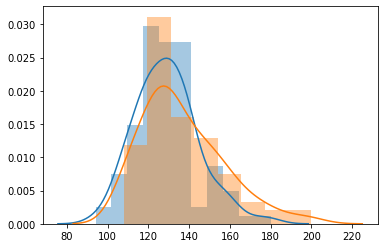

In [147]:
import seaborn as sns
sns.distplot(blood_p_tr[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr[~mask_norm], label="ill person behavior")
plt.show()
def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)
pred_train = predict_umbr(blood_p_tr, 145, 115)
pred_test = predict_umbr(blood_p_te, 145, 115)

> r) Mida la calidad de la clasificación entregada a través de la exactitud (*accuracy*) sobre ambos conjuntos. Evalúe si es necesario variar la decisión sobre el umbral del punto anterior. *Recuerde que, al ser un problema binario, el mínimo que se espera es por sobre 50\%*


In [148]:
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test))

Score train:  0.5869565217391305
Score test:  0.5930232558139535


Se muestra una mejoria leve en el accuracy si se utiliza una estimación de la distribución a partir de los datos de entrenamiento datos.


> s) Compare su *framework* de clasificación con un modelo lineal simple de clasificación binaria como el *perceptrón*, el cual se entrenará para aprender directamente la tarea (de manera supervisada), sin utilizar la información de presión sanguínea. Comente sobre las diferencias, ventajas y desventajas, de cada *approach*.
```python
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 
```

In [149]:
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test))

Score train:  0.8315217391304348
Score test:  0.8023255813953488


Se puede observar claramente que el perceptron es mejor prediciendo en este problema, esto quizas es debido a que el problema es linealmente separable y por tanto el problema se puede resolver relativamente "bien" con este método. Por otro lado queda totalmente en evidencia que un método que se utiliza para predecir deacuerdo a un criterio encontrado "manualmente" (valores en que la presion es anormal como para decidir que se esta enfermo)
es ineficiente para este tipo de problemas, primero por la limitante de incorporar gran cantidad de parametros debido a la dificultad de inferir la relación de estos (debido que se hace manualmente) y por otro lado es inviable si la distribución de los datos cambia puesto que si esta cambia se deben encontrar las relaciones de estos parámetros nuevamente.

> t) Para poder darle una explicación más visual a la clasificación de ambos modelos, y así entender mejor dónde podría estar el error, proyecte los datos en 2 dimensiones. Utilice la técnica de reducción de dimensionalidad **PCA** para representar los datos en las dimensiones deseadas. Comente sobre el comportamiento, puede colorear los datos dado el estado del paciente (enfermedad) y/o la predicción de alguno de los modelos (Perceptrón o con umbral).
```python
from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1])
plt.show()
```

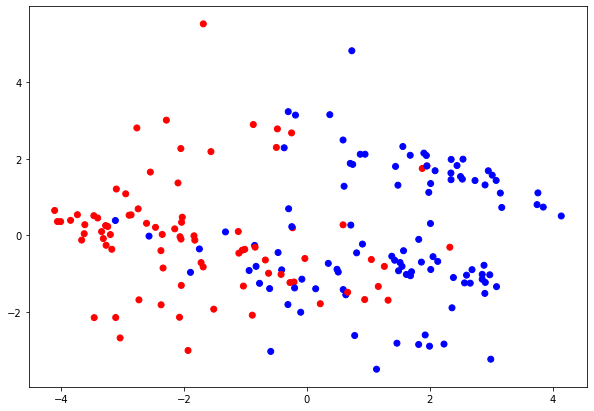

In [150]:
from sklearn.decomposition import PCA
color = [('r' if class_label_train[x] else 'b') for x in range(class_label_train.shape[0])]
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)
plt.figure(figsize=(10,7))
plt.scatter(X_pca_train[:,0], X_pca_train[:,1], color = color)
plt.show()


Si bien los datos se superponen, un modelo lineal deberia poder predecir con accuracy mayor al 50%, puesto que se podrian separar los datos con una recta.

In [151]:
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(X_pca_train, class_label_train)

pred_train = model.predict(X_pca_train) 
pred_test = model.predict(X_pca_test)

print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test))

Score train:  0.717391304347826
Score test:  0.7558139534883721


Finalmente se muestran los resultados de entrenar un perceptron con la reducción de dimensionalidad realizada con PCA, si bien el accuracy bajo a un 70% aproximadamente, ahora el modelo es capaz de predecir con 2 atributos en comparación de las 24 utilizadas anteriormente.

> u) Vuelve a realizar lo anterior pero con otra técnica de reducción de dimensionalidad, como por ejemplo **ICA** [[3]](#refs). Comente

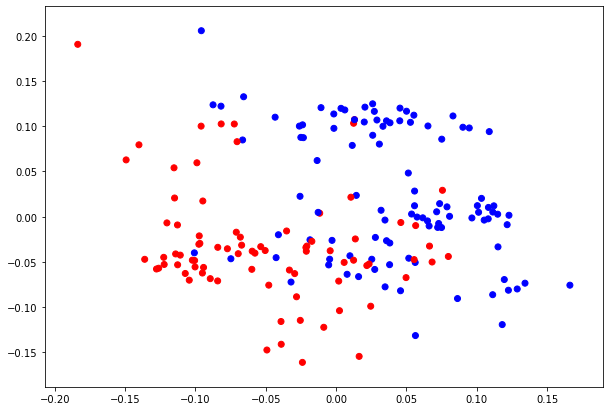

In [160]:
from sklearn.decomposition import FastICA

transformer = FastICA(n_components=2)
X_fica_train = transformer.fit_transform(Xstd_train)
X_fica_test = transformer.fit_transform(Xstd_test)


plt.figure(figsize=(10,7))
plt.scatter(X_fica_train[:,0], X_fica_train[:,1], color = color)
plt.show()

In [161]:
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(X_fica_train, class_label_train)

pred_train = model.predict(X_fica_train) 
pred_test = model.predict(X_fica_test)

print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test))

Score train:  0.8206521739130435
Score test:  0.7790697674418605


Se observa una reducción del accuracy en el conjunto de test, por lo que la reducción de dimensinalidad mediante ICA estaria añadiendo overfitting a nuestro modelo. Esto quizas es devido a que ICA no es lo suficientemente bueno para maximizar la distancia entre clases.

> v) ¿Qué tanto se ve afectada la calidad de predicción si se utiliza la representación reducida generada por PCA vs la representación original? ¿Es esperable este fenómeno? ¿Podría mejorar la calidad de predicción? Proponga e implemente un criterio para seleccionar el número de componentes $d$ en PCA. Comente

Si bien la calidad de predicción se ve afectada, no avismal la diferencia, sin embargo esto depende del problema hasta que punto se puede reducir la dimensionalidad sin afectar la calidad de predicción de forma abrupta. Una forma seria iterar sobre todas las reducciones posibles de mayor dimensionalidad hacia menor de PCA y entrenar el modelo, para luego calcular el error, si el el error empeora más de un $\Delta$ el algoritmo finaliza y el el valor de $d$ seria aquella de la iteración anterior del algoritmo.


<a id="segundo"></a>
## 2. Estimación de edad de personas
El problema de inferir ciertas características de una persona a través de una foto de ella puede resultar bastante dificil incluso para nosotros, como por ejemplo de qué país es, la emoción que expresa, la edad que tiene, o el género. La automatización de este proceso para que máquinas logren identificar ciertas características de una persona puede ser algo crucial para el futuro desarrollo de Inteligencia Artificial.

<img src="https://i.imgur.com/6B072GE.jpg" width="60%" height="20%" />


En esta actividad trabajaremos con unos datos (imágenes) en el **objetivo** de predecir la **edad** (*target value*) de la persona presente en la imagen. Los datos corresponden a 3640 imágenes de rostros de personas extraídos de la plataforma Flickr, pero, debido a que trabajamos con redes *feed forward*, se trabajará con representaciones de alto nivel, extraídas manualmente (no-aprendibles). Para ésto necesitará descargar los datos del siguiente __[link](http://chenlab.ece.cornell.edu/people/Andy/ImagesOfGroups.html)__ en el extracto de *ageGenderClassification* o a través de la consola Unix.
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/ageGenderClassification.zip
```

Se trabajará con archivos *.mat* que pueden ser cargados de la siguiente manera:

In [12]:
import scipy.io as sio
mat_file_test = sio.loadmat("./AgeGenderClassification/eventest.mat")
mat_file_train = sio.loadmat("./AgeGenderClassification/eventrain.mat")


Mientras que para acceder a la información como tal:

In [13]:
# print(mat_file_test["trcoll"].dtype)

data = mat_file_train["trcoll"][0][0] # is "tecoll" for training set
# np.sort(data)

genFeat = data[0]  # Contextual features
age_true = data[1] #target
genClass = data[2] #size is 1xN. either 1 (female) or 2 (male).
ffcoefs = data[3]  # Fisherface space#Cada fila es una proyección de esa cara en un espacio fisherFace, efectivo para la medición de similitud facial.
faceGist = data[4] # caracteristicas esceniales
# faceimg = data[5] #this is a structure that contains a small version of each face. e.g. imagesc(reshape(coll.fimg(1).im,61,49));colormap gray;axis image
# genderGuessNN = data[6]  #adivinar género??
ageGuess = data[7]  #adivinar edad ? 
# name = data[8] #dirección carpeta
facePosSize = data[9]  # Nx7. Each row is [leftEyeX leftEyeY rightEyeX rightEyeY Xcenter YCenter EyeDistance]
# origin = data[10] # ???


In [14]:
print(genFeat[0]) #genFeat: [1090x14 double]     These are the contextual features that are computed:
#			% %   1. xcenter                  (normalized from 0 to 100). Left to right image coord
# 			%     2. ycenter                  (normalized from 0 to 100). top to bottom image coord
# 			%     3. minSpanningTreeDegree
# 			%     4. SizeRelativeToNeighbor   >1 means face bigger than neighbor
# 			%     5. PosX                     % negative means neighbor to the right of face (in eye dist units)
# 			%     6. PosY                     % % negative means Face below NN
# 			%     7. neiAngle                 % Angle of neighbor Face. Left eye at center, Cartesian coord system
# 			%     8. myAngle                  % angle of current Face
# 			%     9. SizeRelAverage           % face size relative to the average
# 			%     10-11. [x y] position relative average. 
# 			%     12. Size Relative to Planar FaceFit. 
# 			%     13. Nearest Neighbor Gender   (NOT USED IN CVPR 09)
# 			%     14. NEarest Neighbor Agebin   (NOT USED IN CVPR 09)

[42.         34.          3.          0.98386991  6.         -0.36363636
  0.1798535  -0.          1.04286927 -3.49598221  0.11850787  1.04375052
  1.          5.        ]


Para descripción sobre las columnas están en el archivo readme a través del siguiente __[link](http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt)__ o a través de la consola Unix:
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt
```

Existen distintas representaciones (descriptores) que usted podrá trabajar y entregársela como *input* a su modelo. Está la libertad de cómo desea trabajar este problema para detectar la edad de la persona, ya sea combinando los descriptores, teniendo un modelo para cada uno, definiendo rangos de edad o cualquier idea que se le ocurra. 

#### Importante
* Recuerde que el conjunto de pruebas está para evaluar su modelo final, **no puede tomar decisiones basadas en este conjunto**. *Sin embargo, Puede generar un conjunto de validación desde el conjunto de entrenamiento o utilizar validación cruzada*.

* La métrica de evaluación será MAPE (*Mean Absolute Percetage Error*).
```python
import numpy as np
```

In [15]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

* Se evaluará la extensión de su experimentación, la correctitud y su creatividad al desarrollar la actividad.

#### --- Bonus ---
Si desea comparar la calidad de solución respecto a otros estudiantes podrá realizar un *submission* de sus resultados en el conjunto de pruebas en la plataforma de __[Kaggle](https://www.kaggle.com/c/t1-ml/)__ a través del siguiente __[link](https://www.kaggle.com/t/3f3c4a759ec3482ab06c06ec91187742)__.

El archivo de *submission* debe contener una columna de *id* asociado a cada conjunto de pruebas, iniciando en 1, se puede generar de la siguiente manera:
```python
ids = np.arange(1, 1+y_pred.shape[0]).reshape(-1,1)
sub_est = np.concatenate([ids, y_pred], axis=-1)
import pandas as pd
df_aux = pd.DataFrame(sub_est, columns=["id","age"])
df_aux.to_csv("test_estimation.csv", index=False)
```

> Para los 3 primeros lugares se otorgará 5, 10 y 15 puntos respectivos en su nota final de esta tarea. 

In [16]:
def ffcoefs_average(ffcoefs_au):
    aux = np.zeros([len(ffcoefs_au), 1])
    for i in range(0,len(ffcoefs_au)):
        aux[i] = sum(ffcoefs_au[i])/len(ffcoefs_au[i])
    return aux
ffcoefs = ffcoefs_average(ffcoefs)

In [17]:
def faceGist_average(faceGist_au):
    aux = np.zeros([len(faceGist_au), 1])
    for i in range(0,len(faceGist_au)):
        aux[i] = sum(faceGist_au[i])/len(faceGist_au[i])
    return aux
faceGist = faceGist_average(faceGist)

In [18]:
def Distance_eyes(facePosSize_au):
    pos = np.zeros([len(facePosSize_au), 1])
    pos1 = np.zeros([len(facePosSize_au), 1])
    pos2 = np.zeros([len(facePosSize_au), 1])
    pos3 = np.zeros([len(facePosSize_au), 1])
    pos4 = np.zeros([len(facePosSize_au), 1])
    pos5 = np.zeros([len(facePosSize_au), 1])
    
    EyeDistance = np.zeros([len(facePosSize_au), 1])
    Eyeizq = np.zeros([len(facePosSize_au), 1])
    Eyeder = np.zeros([len(facePosSize_au), 1])
    for i in range(0,len(facePosSize_au)):
        pos[i] = facePosSize_au[i][0]
        pos1[i] = facePosSize_au[i][1]
        pos2[i] = facePosSize_au[i][2]
        pos3[i] = facePosSize_au[i][3]
        pos4[i] = facePosSize_au[i][4]
        pos5[i] = facePosSize_au[i][5]
        
        EyeDistance[i] = facePosSize_au[i][6]
        Eyeizq[i] = facePosSize_au[i][1] - facePosSize_au[i][5]
        Eyeder[i] = facePosSize_au[i][3] - facePosSize_au[i][5]
    return (EyeDistance, Eyeizq, Eyeder, pos, pos1, pos2, pos3, pos4, pos5)
EyeDistance, Eyeizq, Eyeder, pos, pos1, pos2, pos3, pos4, pos5 = Distance_eyes(facePosSize)
# print(Eyeizq)
# print(Eyeder)

In [19]:
def size_relative(genFeat_au):
    tam = np.zeros([len(genFeat_au), 1])
    tam1 = np.zeros([len(genFeat_au), 1])
    tam2 = np.zeros([len(genFeat_au), 1])
    tam3 = np.zeros([len(genFeat_au), 1])
    tam4 = np.zeros([len(genFeat_au), 1])
    tam5 = np.zeros([len(genFeat_au), 1])
    tam6 = np.zeros([len(genFeat_au), 1])
    tam7 = np.zeros([len(genFeat_au), 1])
    tam8 = np.zeros([len(genFeat_au), 1])
    tam10 = np.zeros([len(genFeat_au), 1])
    tam11 = np.zeros([len(genFeat_au), 1])
    
    tam_prom_comp = np.zeros([len(genFeat_au), 1])
    tam_flat_comp = np.zeros([len(genFeat_au), 1])
    for i in range(0,len(genFeat_au)):
        tam[i] = genFeat_au[i][0]
        tam1[i] = genFeat_au[i][1]
        tam2[i] = genFeat_au[i][2]
        tam3[i] = genFeat_au[i][3]
        tam4[i] = genFeat_au[i][4]
        tam5[i] = genFeat_au[i][5]
        tam6[i] = genFeat_au[i][6]
        tam7[i] = genFeat_au[i][7]
        tam8[i] = genFeat_au[i][8]
        tam_prom_comp[i] = genFeat_au[i][9]
        tam10[i] = genFeat_au[i][10]
        tam11[i] = genFeat_au[i][11]
        tam_flat_comp[i] = genFeat_au[i][12]
    return (tam_prom_comp, tam_flat_comp,tam,tam1,tam2,tam3,tam4,tam5,tam6,tam,tam7,tam8,tam10,tam11)
tam_prom_comp, tam_flat_comp,tam,tam1,tam2,tam3,tam4,tam5,tam6,tam,tam7,tam8,tam10,tam11 = size_relative(genFeat)

In [20]:
def age_range(age):
    age = age if age>0 else -age
    if(0 <= age <= 2):
        return 1
    elif(3 <= age <= 7):
        return 5
    elif(8 <= age <= 12):
        return 10
    elif(13 <= age <= 19):
        return 16
    elif(20 <= age <= 36):
        return 28
    elif(37 <= age <= 65):
        return 51
    elif(66 <= age):
        return 75
    else:
        return -1

In [21]:
# Creación de un conjunto de datos para entrenamiento
# trX = np.linspace(0, 100, 101)
# print(genClass.shape, ffcoefs.shape, faceGist.shape, Eyeizq.shape, Eyeder.shape, EyeDistance.shape, tam_prom_comp.shape, tam_flat_comp.shape)
trX = np.concatenate((age_true, genClass, ffcoefs, faceGist, Eyeizq, Eyeder, EyeDistance, tam_prom_comp, tam_flat_comp,tam,tam1,tam2,tam3,tam4,tam5,tam6,tam,tam7,tam8,tam10,tam11, pos, pos1, pos2, pos3, pos4, pos5), axis=1) #ageGuess
trX = np.sort(trX)

In [22]:
# trY = age_true
# Definición de los ajustes y parámetros iniciales
num_steps = 100
learningRate = 0.0007
criteria = 1e-8
b_0 = 1
b_1 = np.ones(trX.shape[1]-1)

# Proceso iterativo
for step in range(0, num_steps):
    b_0_gradient = 0
    b_1_gradient = np.ones(trX.shape[1]-1)
    N = float(len(trX))
    for i in range(0, trX.shape[0]):
        b_0_gradient -= (1/N) * (trX[i,:][1] - (b_0 + (b_1.T).dot(trX[i,:][1:])))
        b_1_gradient -= (1/N) * (trX[i,:][1] - (b_0 + (b_1.T).dot(trX[i,:][1:]))) * trX[i,:][1:]
    b_0 = b_0 - (learningRate * b_0_gradient)
    b_1 = b_1 - (learningRate * b_1_gradient)
    if max(abs(learningRate * b_0_gradient), abs(sum(learningRate * b_1_gradient))) < criteria:
        break
def predict(x_test,b_0,b_1):
    return b_0 + b_1.dot(x_test)
# Impresión de los resultados
print("Los valores que se obtienen son:", b_0, b_1, "en pasos", step)

Los valores que se obtienen son: 8.774400753876184e+277 [-2.86742170e+278 -1.18209767e+278 -4.11393447e+277 -6.85881995e+276
  1.43800314e+277  3.70450991e+277  6.13963221e+277  7.83737381e+277
  8.87109505e+277  1.00371501e+278  1.21126798e+278  1.56050364e+278
  2.19632918e+278  3.45421461e+278  6.92325215e+278  1.44452964e+279
  2.44182236e+279  3.87210560e+279  5.11180659e+279  5.76514086e+279
  2.26757137e+280  2.29944481e+280  2.32792789e+280  4.59944132e+280
  4.68062737e+280  4.76356987e+280] en pasos 99


In [23]:
data_test = mat_file_test["tecoll"][0][0]
# np.sort(data_test)

genFeat_test = data_test[0]  # Contextual features
age_true_test = data_test[1] #target
genClass_test = data_test[2] #size is 1xN. either 1 (female) or 2 (male).
ffcoefs_test = data_test[3]  # Fisherface space#Cada fila es una proyección de esa cara en un espacio fisherFace, efectivo para la medición de similitud facial.
faceGist_test = data_test[4] # caracteristicas esceniales
ageGuess_test = data_test[7]  #adivinar edad ? 
facePosSize_test = data_test[9]  # Nx7. Each row is [leftEyeX leftEyeY rightEyeX rightEyeY Xcenter YCenter EyeDistance]

ffcoefs_test = ffcoefs_average(ffcoefs_test)
faceGist_test = faceGist_average(faceGist_test)
EyeDistance_test, Eyeizq_test, Eyeder_test, pos, pos1, pos2, pos3, pos4, pos5 = Distance_eyes(facePosSize_test)
tam_prom_comp_test, tam_flat_comp_test,tam,tam1,tam2,tam3,tam4,tam5,tam6,tam,tam7,tam8,tam10,tam11 = size_relative(genFeat_test)
x_test = np.concatenate((genClass_test, ffcoefs_test, faceGist_test, Eyeizq_test, Eyeder_test, EyeDistance_test, tam_prom_comp_test, tam_flat_comp_test,tam,tam1,tam2,tam3,tam4,tam5,tam6,tam,tam7,tam8,tam10,tam11,pos, pos1, pos2, pos3, pos4, pos5), axis=1) #ageGuess_test 

c=0
aciertos = 0
for j in range(0, len(x_test)):
    prediction =  age_range(predict(x_test[j],b_0,b_1))
#     print(predict(x_test[j],b_0,b_1), age_true_test[j])
    if(prediction == age_true_test[j]):
        aciertos +=1
    c +=1
print(f"accuracy: {round(100*aciertos/c)}% ,{aciertos} aciertos de {c}")

accuracy: 14% ,150 aciertos de 1050


<a id="refs"></a>
## Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] Ethem Alpaydin. *Machine Learning*. 2014.  
[3] Hyvärinen, A., & Oja, E. (2000). *Independent component analysis: algorithms and applications*. Neural networks, 13(4-5), 411-430.